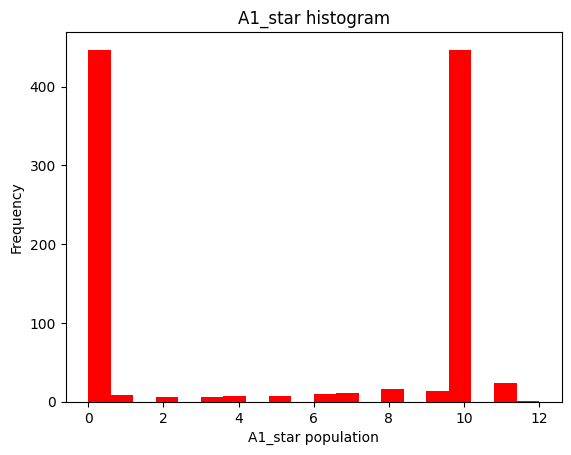

In [8]:
#2.2

import numpy as np
# Initial populations  - 
#A1=10, A2=10, E=0, S=0, A1_star=0, A1_inactive=0
time=[0] #Keep track of time.
sim_time=10 #Defining simulation of time.

k = np.array([1,1,100,1,100,1])  #Defining the rates

A1_star = [0]  #Starting it as zero

#We'll start the simulation.

for i in range(1000):
    C=np.array([10,10,0,0,0,0]) #Every iteration resets collapsed state.
    time=[0]                    #Time reset
    
    while time[-1]<sim_time:
        if C[0]==0:
            break
        #the propensities of the reactions.
        u0 = k[0] * C[0]
        u1 = k[1] * C[1]
        u2 = k[2] * C[2] * C[1]
        u3 = k[3] * C[4]
        u4 = k[4] * C[3] * C[0]
        u5 = k[5] * C[3]
        u6 = k[5] * C[2]
        
        #Propensities array
        u = np.array([u0, u1, u2, u3, u4, u5, u6])   
        
        U = u.sum() #Total propensity.
        
        prob = u/U  #u divided by sum of all the u's.
        
        #The stoichiometric array
        sto = np.array([ 
        [0, 0, 1, 0, 0, 0],   #Reaction 1
        [0, 0, 0, 1, 0, 0],   #Reaction 2
        [-1, 0, 0, 0, 1, 0],  #Reaction 3
        [0, 0, 0, 0, 1, 0],   #Reaction 4
        [-1, 0, 0, 0, 0, 1],   #Reaction 5
        [0, 0, 0, -1, 0, 0],   #Reaction 6
        [0, 0, -1, 0, 0, 0]   #Reaction 7
        ]) 
        
        #Sampling the reaction event out of 
        #7 possible reactions, based on probabilities.
        event = np.random.choice (7, p=prob)
        #Choosing that row from the stoichiometric matrix.
        row = sto[event,:]
        #Adding that row to the collapsed population.
        C = C + row
        
        #Sampling holding time.
        hld_time = np.random.exponential(scale=(1/U))
        
        #Updating time.
        time.append(time[-1]+hld_time)
        
    #Updating A1_star population.
    A1_star.append(C[4])
        
    #print(A1_star)
    
import matplotlib.pyplot as plt

#Plot histogram.
plt.hist(A1_star, bins=20, color='Red')

#Add labels and title.
plt.title('A1_star histogram')
plt.xlabel('A1_star population')
plt.ylabel('Frequency')

#Show the plot.
plt.show()


        
        
            
            



In [ ]:
#We see that histogram of  A1_star is between 0 and 12, because
#of high reaction rates of reactions 3 and 5.
#A1_star doesn't increase much as rxn 5 depletes it.



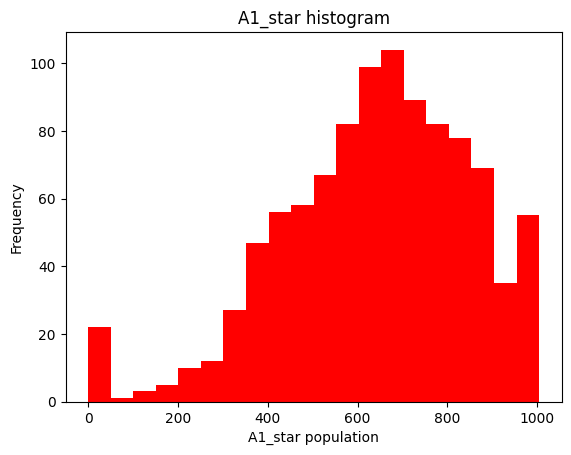